In [1]:
%load_ext autoreload
%autoreload 2

import os
from jax import config
config.update("jax_enable_x64", True)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from encoding_information.datasets import BSCCMDataset, MNISTDataset
import jax.numpy as np

from cleanplots import *

2024-09-13 10:06:39.315044: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-13 10:06:40.343522: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-09-13 10:06:40.343633: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-09-13 10:06:40.343642: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [2]:
dataset = BSCCMDataset('/home/hpinkard_waller/data/BSCCM/')
measurements = dataset.get_measurements(num_measurements=2000, mean=100, bias=10)

Opening BSCCM
Opened BSCCM


In [3]:

from encoding_information import extract_patches

patch_size = 16
num_patches = 2000
test_set_size = 200

patches = extract_patches(measurements[:-test_set_size], patch_size=patch_size, num_patches=num_patches, verbose=True)
test_patches = extract_patches(measurements[-test_set_size:], patch_size=patch_size, num_patches=num_patches, verbose=True)                          

100%|██████████| 2000/2000 [00:05<00:00, 339.71it/s]


In [4]:
from encoding_information.models import PixelCNN, FullGaussianProcess, StationaryGaussianProcess 

num_samples = 8

pixel_cnn = PixelCNN()
full_gp = FullGaussianProcess(patches)
stationary_gp = StationaryGaussianProcess(patches)

# fit models
for model in [pixel_cnn, full_gp, stationary_gp]:
    model.fit(patches)

# generate samples
pixel_cnn_samples = pixel_cnn.generate_samples(num_samples=num_samples)
full_gp_samples = full_gp.generate_samples(num_samples=num_samples)
stationary_gp_samples = stationary_gp.generate_samples(num_samples=num_samples)


2024-09-13 10:07:04.479534: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


Initial validation NLL: 8.50


Epoch 1: 100%|██████████| 100/100 [00:08<00:00, 11.79it/s]


Epoch 1: validation NLL: 3.96


Epoch 2: 100%|██████████| 100/100 [00:01<00:00, 68.76it/s]


Epoch 2: validation NLL: 3.95


Epoch 3: 100%|██████████| 100/100 [00:01<00:00, 75.26it/s]


Epoch 3: validation NLL: 3.94


Epoch 4: 100%|██████████| 100/100 [00:01<00:00, 74.67it/s]


Epoch 4: validation NLL: 3.94


Epoch 5: 100%|██████████| 100/100 [00:01<00:00, 75.91it/s]


Epoch 5: validation NLL: 3.93


Epoch 6: 100%|██████████| 100/100 [00:01<00:00, 75.01it/s]


Epoch 6: validation NLL: 3.93


Epoch 7: 100%|██████████| 100/100 [00:01<00:00, 72.94it/s]


Epoch 7: validation NLL: 3.93


Epoch 8: 100%|██████████| 100/100 [00:01<00:00, 74.09it/s]


Epoch 8: validation NLL: 3.93


Epoch 9: 100%|██████████| 100/100 [00:01<00:00, 74.71it/s]


Epoch 9: validation NLL: 3.95


Epoch 10: 100%|██████████| 100/100 [00:01<00:00, 73.65it/s]


Epoch 10: validation NLL: 3.95


Epoch 11: 100%|██████████| 100/100 [00:01<00:00, 74.99it/s]


Epoch 11: validation NLL: 3.96


Epoch 12: 100%|██████████| 100/100 [00:01<00:00, 73.20it/s]


Epoch 12: validation NLL: 3.99


Epoch 13: 100%|██████████| 100/100 [00:01<00:00, 74.30it/s]


Epoch 13: validation NLL: 4.02


Epoch 14: 100%|██████████| 100/100 [00:01<00:00, 73.66it/s]


Epoch 14: validation NLL: 4.01


Epoch 15: 100%|██████████| 100/100 [00:01<00:00, 73.18it/s]


Epoch 15: validation NLL: 4.02


Epoch 16: 100%|██████████| 100/100 [00:01<00:00, 75.10it/s]


Epoch 16: validation NLL: 4.04


Epoch 17: 100%|██████████| 100/100 [00:01<00:00, 73.57it/s]


Epoch 17: validation NLL: 4.05


Epoch 18: 100%|██████████| 100/100 [00:01<00:00, 72.85it/s]


Epoch 18: validation NLL: 4.05


Epoch 19: 100%|██████████| 100/100 [00:01<00:00, 74.62it/s]


Epoch 19: validation NLL: 4.08


Epoch 20: 100%|██████████| 100/100 [00:01<00:00, 74.59it/s]


Epoch 20: validation NLL: 4.06


Epoch 21: 100%|██████████| 100/100 [00:01<00:00, 72.08it/s]


Epoch 21: validation NLL: 4.08


Epoch 22: 100%|██████████| 100/100 [00:01<00:00, 69.02it/s]


Epoch 22: validation NLL: 4.10


Epoch 23: 100%|██████████| 100/100 [00:01<00:00, 70.32it/s]


Epoch 23: validation NLL: 4.09


Epoch 24: 100%|██████████| 100/100 [00:01<00:00, 70.57it/s]


Epoch 24: validation NLL: 4.10


Epoch 25: 100%|██████████| 100/100 [00:01<00:00, 70.61it/s]


Epoch 25: validation NLL: 4.07


Epoch 26: 100%|██████████| 100/100 [00:01<00:00, 71.47it/s]


Epoch 26: validation NLL: 4.09


Epoch 27: 100%|██████████| 100/100 [00:01<00:00, 75.29it/s]


Epoch 27: validation NLL: 4.13


Epoch 28: 100%|██████████| 100/100 [00:01<00:00, 72.30it/s]


Epoch 28: validation NLL: 4.08


Epoch 29: 100%|██████████| 100/100 [00:01<00:00, 74.59it/s]


Epoch 29: validation NLL: 4.09


Epoch 30: 100%|██████████| 100/100 [00:01<00:00, 71.10it/s]


Epoch 30: validation NLL: 4.09


Epoch 31: 100%|██████████| 100/100 [00:01<00:00, 73.63it/s]


Epoch 31: validation NLL: 4.08


Epoch 32: 100%|██████████| 100/100 [00:01<00:00, 72.59it/s]


Epoch 32: validation NLL: 4.09


Epoch 33: 100%|██████████| 100/100 [00:01<00:00, 72.31it/s]


Epoch 33: validation NLL: 4.09


Epoch 34: 100%|██████████| 100/100 [00:01<00:00, 72.26it/s]


Epoch 34: validation NLL: 4.07


Epoch 35: 100%|██████████| 100/100 [00:01<00:00, 73.10it/s]


Epoch 35: validation NLL: 4.07


Epoch 36: 100%|██████████| 100/100 [00:01<00:00, 72.37it/s]


Epoch 36: validation NLL: 4.06


Epoch 37: 100%|██████████| 100/100 [00:01<00:00, 72.67it/s]


Epoch 37: validation NLL: 4.07


Epoch 38: 100%|██████████| 100/100 [00:01<00:00, 72.49it/s]


Epoch 38: validation NLL: 4.05


Epoch 39: 100%|██████████| 100/100 [00:01<00:00, 72.37it/s]


Epoch 39: validation NLL: 4.05


Epoch 40: 100%|██████████| 100/100 [00:01<00:00, 71.49it/s]


Epoch 40: validation NLL: 4.06


Epoch 41: 100%|██████████| 100/100 [00:01<00:00, 71.88it/s]


Epoch 41: validation NLL: 4.06


Epoch 42: 100%|██████████| 100/100 [00:01<00:00, 72.93it/s]


Epoch 42: validation NLL: 4.03


Epoch 43: 100%|██████████| 100/100 [00:01<00:00, 73.58it/s]


Epoch 43: validation NLL: 4.02


Epoch 44: 100%|██████████| 100/100 [00:01<00:00, 74.35it/s]


Epoch 44: validation NLL: 4.03


Epoch 45: 100%|██████████| 100/100 [00:01<00:00, 75.36it/s]


Epoch 45: validation NLL: 4.02


Epoch 46: 100%|██████████| 100/100 [00:01<00:00, 74.96it/s]


Epoch 46: validation NLL: 4.03


Epoch 47: 100%|██████████| 100/100 [00:01<00:00, 74.06it/s]


Epoch 47: validation NLL: 4.02


Epoch 48: 100%|██████████| 100/100 [00:01<00:00, 75.03it/s]
/2tb_nvme/hpinkard_waller/GitRepos/EncodingInformation/src/encoding_information/models/gaussian_process.py:709: UserWarning: Gaussian process is already fit. No need to call fit method
  warnings.warn('Gaussian process is already fit. No need to call fit method')


Epoch 48: validation NLL: 4.01
Initial validation NLL: 3.96


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.10s/it]


Epoch 1: validation NLL: 3.96


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 34.52it/s]


Epoch 2: validation NLL: 3.96


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 38.06it/s]


Epoch 3: validation NLL: 3.96


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 36.98it/s]


Epoch 4: validation NLL: 3.95


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 36.95it/s]


Epoch 5: validation NLL: 3.96


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 36.69it/s]


Epoch 6: validation NLL: 3.96


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 37.93it/s]


Epoch 7: validation NLL: 3.96


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 36.41it/s]


Epoch 8: validation NLL: 3.96


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 36.26it/s]


Epoch 9: validation NLL: 3.96


Epoch 10: 100%|██████████| 1/1 [00:00<00:00, 38.10it/s]


Epoch 10: validation NLL: 3.96


Epoch 11: 100%|██████████| 1/1 [00:00<00:00, 38.07it/s]


Epoch 11: validation NLL: 3.96


Epoch 12: 100%|██████████| 1/1 [00:00<00:00, 37.27it/s]


Epoch 12: validation NLL: 3.96


Epoch 13: 100%|██████████| 1/1 [00:00<00:00, 37.67it/s]


Epoch 13: validation NLL: 3.96


Epoch 14: 100%|██████████| 1/1 [00:00<00:00, 37.75it/s]


Epoch 14: validation NLL: 3.96


Epoch 15: 100%|██████████| 1/1 [00:00<00:00, 36.53it/s]


Epoch 15: validation NLL: 3.96


Epoch 16: 100%|██████████| 1/1 [00:00<00:00, 38.05it/s]


Epoch 16: validation NLL: 3.96


Epoch 17: 100%|██████████| 1/1 [00:00<00:00, 37.91it/s]


Epoch 17: validation NLL: 3.96


Epoch 18: 100%|██████████| 1/1 [00:00<00:00, 36.67it/s]


Epoch 18: validation NLL: 3.96


Epoch 19: 100%|██████████| 1/1 [00:00<00:00, 37.17it/s]


Epoch 19: validation NLL: 3.96


Generating PixelCNN samples:   0%|          | 0/16 [00:00<?, ?it/s]2024-09-13 10:08:55.119003: W external/xla/xla/service/gpu/conv_algorithm_picker.cc:808] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.
2024-09-13 10:08:55.119040: W external/xla/xla/service/gpu/conv_algorithm_picker.cc:811] Conv: (f64[8,128,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f64[8,64,16,16]{3,2,1,0}, f64[128,64,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}
Generating PixelCNN samples: 100%|██████████| 16/16 [01:06<00:00,  4.14s/it]


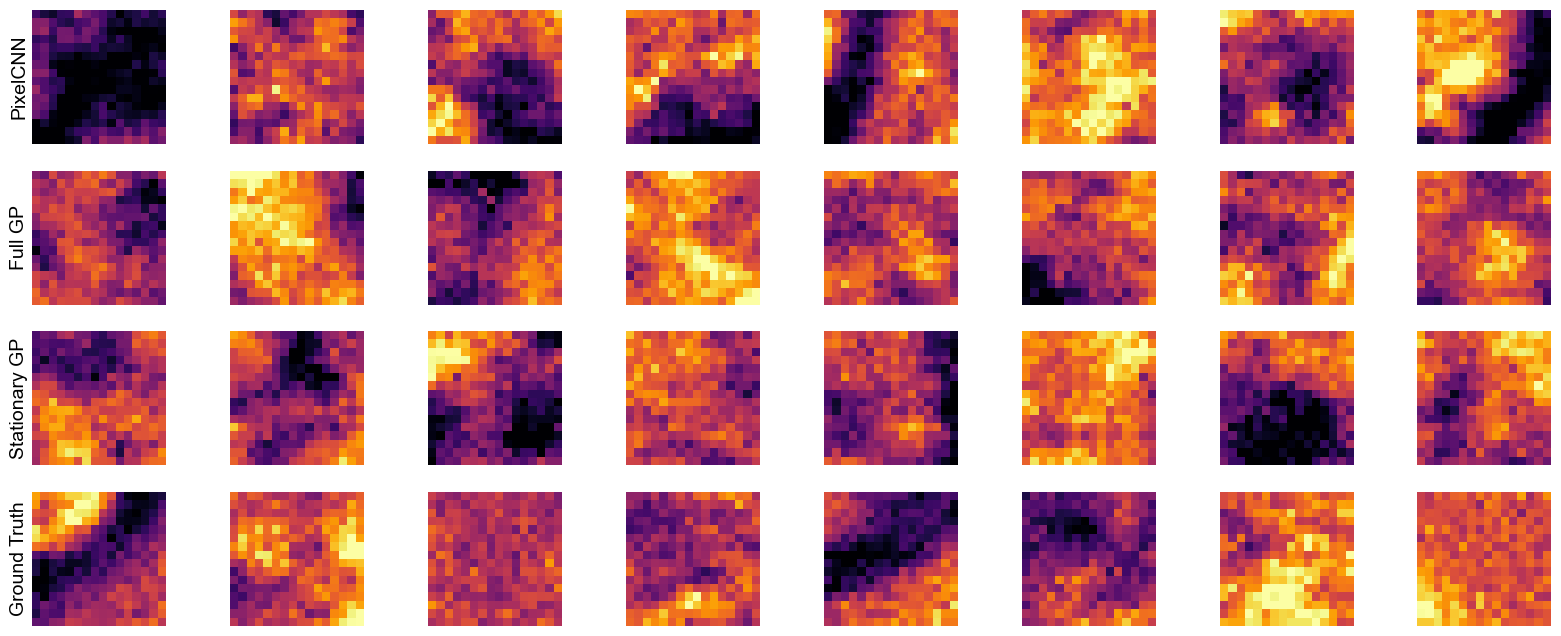

In [13]:
from encoding_information.plot_utils import plot_samples

plot_samples([pixel_cnn_samples, full_gp_samples, stationary_gp_samples], test_patches, model_names=['PixelCNN', 'Full GP', 'Stationary GP'])

In [12]:
from encoding_information.models import PoissonNoiseModel
from encoding_information import estimate_information

noise_model = PoissonNoiseModel()

pixel_cnn_info, pixel_cnn_lower_bound, pixel_cnn_upper_bound = estimate_information(pixel_cnn, noise_model, patches, test_patches, confidence_interval=0.95)
full_gp_info, full_gp_lower_bound, full_gp_upper_bound = estimate_information(full_gp, noise_model, patches, test_patches, confidence_interval=0.95)
stationary_gp_info, stationary_gp_lower_bound, stationary_gp_upper_bound = estimate_information(stationary_gp, noise_model, patches, test_patches, confidence_interval=0.95)

Evaluating NLL: 63it [00:01, 35.54it/s]
precomputing masks and variances: 100%|██████████| 16/16 [00:00<00:00, 135.74it/s]


evaluating likelihood


100%|██████████| 11/11 [02:27<00:00, 13.39s/it]


## Plot different models + error bars

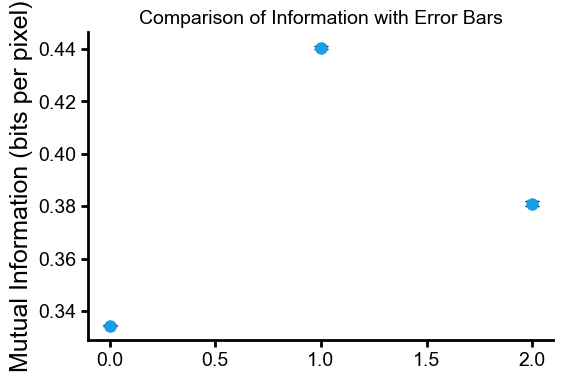

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

info = [pixel_cnn_info, full_gp_info, stationary_gp_info]
lower_bounds = [pixel_cnn_lower_bound, full_gp_lower_bound, stationary_gp_lower_bound]
upper_bounds = [pixel_cnn_upper_bound, full_gp_upper_bound, stationary_gp_upper_bound]
lower_errors = np.abs(np.array(info) - np.array(lower_bounds))
upper_errors = np.abs(np.array(upper_bounds) - np.array(info))
error_bars = [lower_errors, upper_errors]

plt.errorbar([0, 1, 2], [pixel_cnn_info, full_gp_info, stationary_gp_info], yerr=error_bars, fmt='o', capsize=5, ecolor='black', markersize=8)
plt.ylabel('Information')
plt.title('Comparison of Information with Error Bars')

ax.set_ylabel('Mutual Information (bits per pixel)')
clear_spines(ax)
